# Visualización de datos con pandas/matplotlib

> La librería `pandas` se integra con `matplotlib` para permitir la visualización directa de Dataframes.
> A continuación veremos cómo generar distintos tipos de gráficos.

El primer paso es importar las librerías (pandas + librerías gráficas).

Igualmente configuraremos el cuaderno `jupyter` para mostrar los gráficos dentro de las celdas del cuaderno.
En este caso se permite el uso de "atajos" (_magic_), caracterizados por comenzar por el caracter `'%'`.

In [7]:
%matplotlib inline
# atajo `matplotlib` siempre antes de `import pandas`

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns  # opcional

En este punto podemos, opcionalmente, establecer diferentes parámetros gráficos, como el [estilo](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html), tamaño por defecto de las imágenes, etc.

In [9]:
sns.set()
# De forma alternativa, sin seaborn:
# plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams['font.family'] = ['monospace']

Dibujar directamente con `matplotlib` exige controlar cada uno de los detalles (color, etiquetas, título, ...)

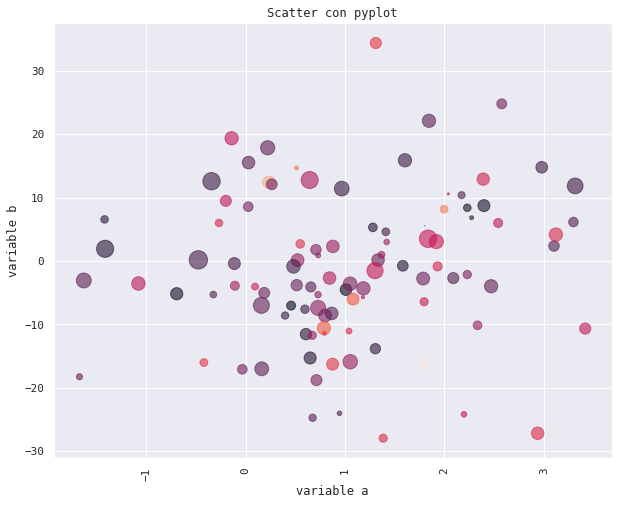

In [10]:
N = 100
np.random.seed(7384)

data = {'a': np.random.randn(N) + 1,
        'c': np.random.gamma(10, size=N),
        'd': np.random.randn(N) - 1}
data['b'] = data['a'] + 10 * np.random.randn(N)
data['d'] = np.abs(data['d']) * N

plt.scatter('a', 'b', s='d', c='c', data=data, alpha=0.6)
plt.xlabel('variable a')
plt.ylabel('variable b')
plt.xticks(rotation='vertical')
plt.title('Scatter con pyplot');

True

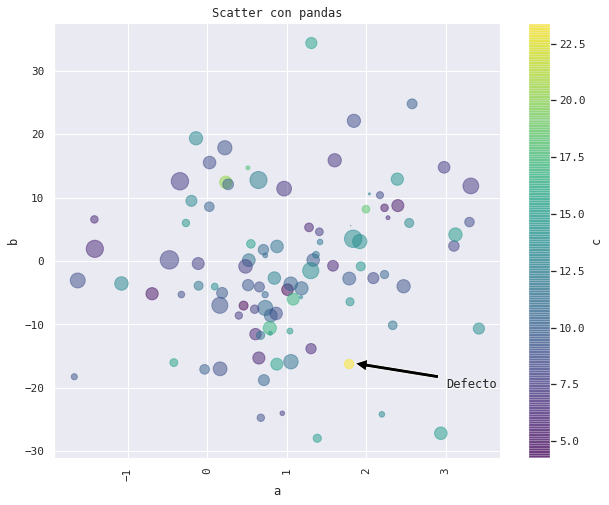

In [11]:
fig, ax = plt.subplots()
df = pd.DataFrame.from_dict(data)
ax2 = df.plot.scatter(
    'a', 'b', c='c', s=df['d'],
    colormap='viridis', alpha=.5,
    title='Scatter con pandas', rot='vertical',
    ax=ax)
ax.annotate(
    'Defecto', xy=(1.8, -16),
     xytext=(3, -20),
     arrowprops=dict(facecolor='black', shrink=0.05)
);

ax2 == ax

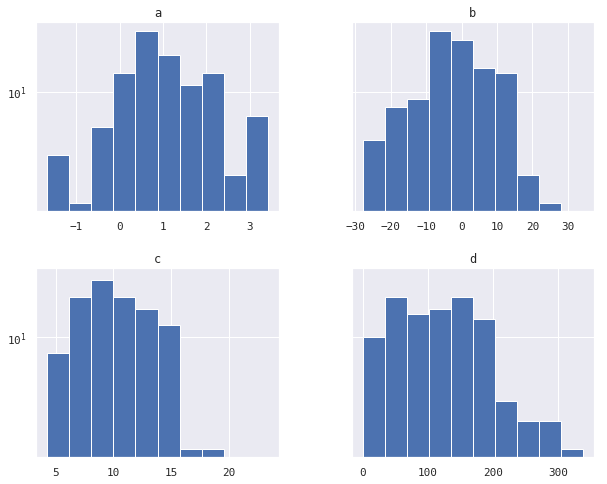

In [12]:
df.hist(sharey=True, log=True);  # finalizar con caracter ';' omite el texto de salida

Para crear varios gráficos superpuestos, almacenaremos el eje (`ax`) donde dibujar

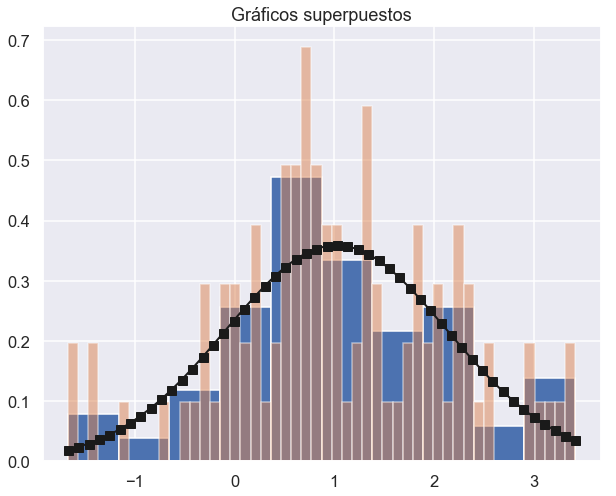

In [19]:
sns.set_context("talk", rc={"lines.linewidth": 2})

bins = 50
ax = df.hist('a', density=1)  # creado directamente
df.hist('a', bins=bins, density=1, alpha=.5, ax=ax)

x = np.linspace(
    df.a.min(),
    df.a.max(),
    bins
)
y = (1 / (np.sqrt(2 * np.pi) * df.a.std())) * \
    np.exp(-0.5 * (1 / df.a.std() * (x - df.a.mean()))**2)

plt.plot(x, y, 'ks-');
plt.title('Gráficos superpuestos');

In [14]:
sns.

SyntaxError: invalid syntax (<ipython-input-14-40c5c93bca4b>, line 1)

In [9]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Paleta de colores


En `matplotlib` usaremos

plt.set_cmap('Reds')

o bien, cada vez que dibujemos:

~~~python
cmap = plt.cm.Reds
data.plot.scatter(x, y, cm=cmap)
~~~

En `seaborn`:

Global:
~~~python
sns.set_palette(sns.color_palette('Reds'))
~~~

Temporal:
~~~python
with sns.color_palette('Greens'):
    ...
~~~

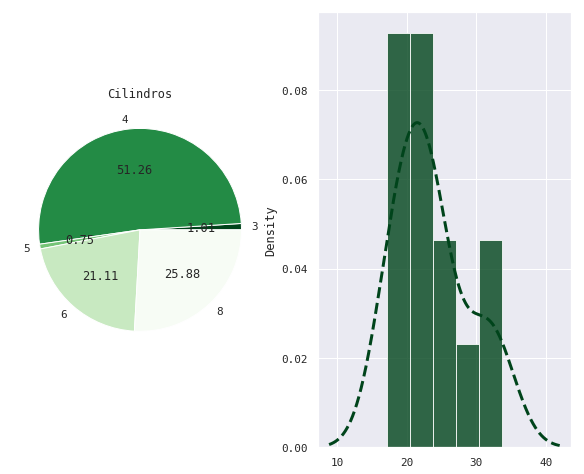

In [48]:
ax = plt.subplot(121)

df = sns.load_dataset('mpg')
cmap = plt.cm.Greens_r

df1 = df.groupby(by='cylinders').count().name
df1.reset_index()
ax = df1.plot.pie(cmap=cmap, title='Cilindros', autopct='%.2f', ax=ax)
ax.set_ylabel('')

ax = plt.subplot(122)
df2 = df.groupby('model_year').agg('mean').sort_values('weight')

df2.mpg.plot.hist(density=True, bins=5, alpha=.8, cmap=cmap, ax=ax)
df2.mpg.plot.kde(linewidth=3, style='--', cmap=cmap, ax=ax);

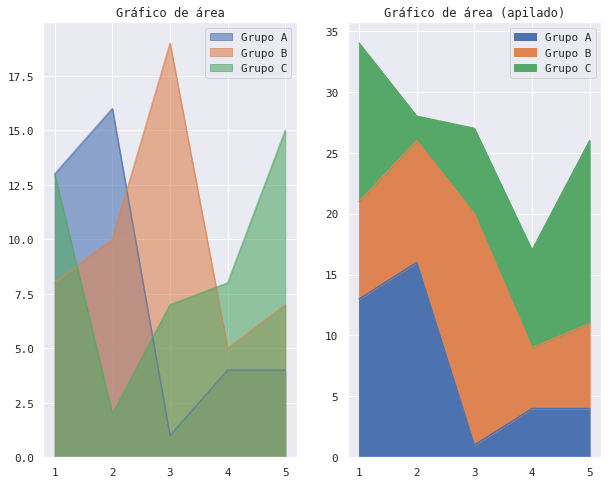

In [72]:
np.random.seed(0)
N = 5
data = pd.DataFrame({'Grupo A': np.random.randint(1, 20, N),
                     'Grupo B': np.random.randint(1, 20, N),
                     'Grupo C': np.random.randint(1, 20, N)},
                    index=range(1, N+1))
ax = plt.subplot(1, 2, 1)
data.plot.area(stacked=False, alpha=.6, title='Gráfico de área', ax=ax)
ax = plt.subplot(1, 2, 2)
data.plot.area(title='Gráfico de área (apilado)', ax=ax);

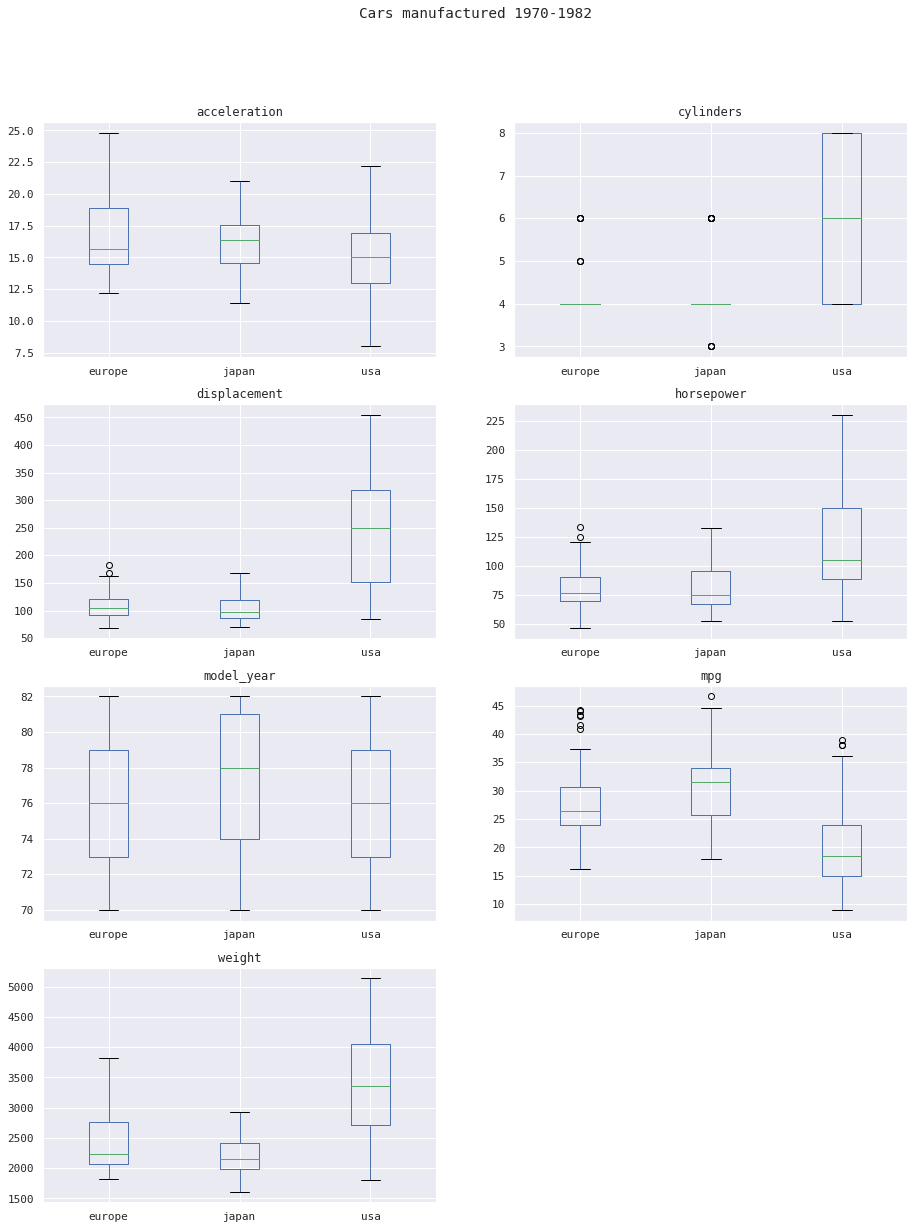

In [143]:
fig, ax = plt.subplots(4, 2, sharex=False, figsize=(15, 20))

# Número de subplots debe ser igual al número de variables (7)
ax[-1, -1].axis('off')  # no dibujar el último
ax=ax.flatten()[:-1]  # eliminar el último de la lista

df.boxplot(by='origin', ax=ax)
fig.suptitle('Cars manufactured 1970-1982')
_ = [_ax.set_xlabel('') for _ax in ax]


# Guardar gráficos a fichero

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b4b1df198>,
      dtype=object)

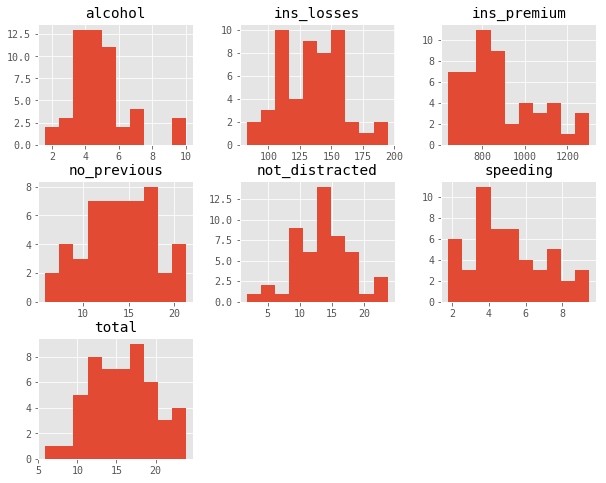

In [12]:
crashes.hist()

## Alternativa con `matplotlib`:

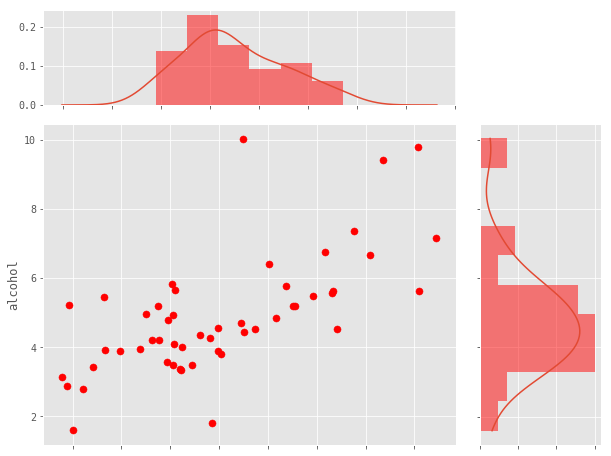

In [185]:
from scipy.stats import gaussian_kde

ax1 = plt.subplot2grid((4, 4), (1, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4, 4), (0, 0), colspan=3)
ax3 = plt.subplot2grid((4, 4), (1, 3), rowspan=3)

crashes.plot.kde(y='speeding', ax=ax2, sharex=ax1, legend=None)
crashes.plot.hist(y='speeding', bins=6, ax=ax2, sharex=ax1, normed=True, legend=None, alpha=.5, color='red')
crashes.plot.scatter(x='speeding', y='alcohol', ax=ax1, color='red', s=50)

ax2.set_ylabel('')
ax2.set_yticks=[]
ax2.set_yticklabels=[]

# No está soportado directamente el rotado en kde
kde_speeding = gaussian_kde(crashes.alcohol)
y = np.linspace(np.amin(crashes.alcohol), np.amax(crashes.alcohol), 100)
ax3.plot(kde_speeding(y), y)
crashes.plot.hist(y='alcohol', ax=ax3, sharey=ax1, normed=True, legend=None, orientation='horizontal', alpha=.5, color='red');



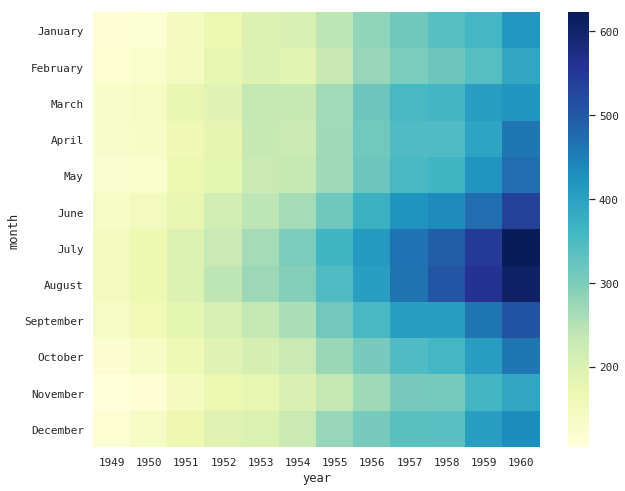

In [60]:
# Heatmaps
flights = df.pivot("month", "year", "passengers")
sns.heatmap(flights,cmap="YlGnBu")

## Datos categóricos

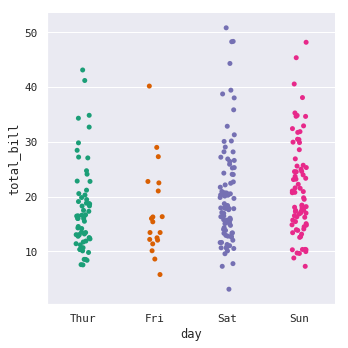

In [65]:
tips = sns.load_dataset("tips")
with sns.color_palette('Dark2'):
    sns.catplot(x="day", y="total_bill", data=tips);


In [2]:
%p

UsageError: Line magic function `%plt` not found.
